In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
df = pd.read_csv('adult_dataset.csv',na_values='?')
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()    

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
X = df[['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']]
X[0:10]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States


In [ ]:
#Class or Target Variable
y = df['income']
y[0:10]

1     <=50K
3     <=50K
4     <=50K
5     <=50K
6     <=50K
7      >50K
8     <=50K
10     >50K
11     >50K
12     >50K
Name: income, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Transform all categorical columns in Dependant Varaible X
for i in X.columns:
    if X[i].dtype not in ['int64','float64']:
        X[i]=le.fit_transform(X[i])
    

#Convert X into numpy array
X = X.values

In [ ]:
X[0:5]

array([[    82,      2, 132870,     11,      9,      6,      3,      1,
             4,      0,      0,   4356,     18,     38],
       [    54,      2, 140359,      5,      4,      0,      6,      4,
             4,      0,      0,   3900,     40,     38],
       [    41,      2, 264663,     15,     10,      5,      9,      3,
             4,      0,      0,   3900,     40,     38],
       [    34,      2, 216864,     11,      9,      0,      7,      4,
             4,      0,      0,   3770,     45,     38],
       [    38,      2, 150601,      0,      6,      5,      0,      4,
             4,      1,      0,   3770,     40,     38]], dtype=int64)

In [ ]:
#Decison tree Setting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=3)



In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24129, 14), (6033, 14), (24129,), (6033,))

In [ ]:
adult_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
adult_tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
adult_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(180.79200000000003, 195.696, 'X[7] <= 0.5\nentropy = 0.811\nsamples = 24129\nvalue = [18107, 6022]'),
 Text(100.44000000000001, 152.208, 'X[4] <= 12.5\nentropy = 0.994\nsamples = 9999\nvalue = [5442, 4557]'),
 Text(53.568000000000005, 108.72, 'X[10] <= 5095.5\nentropy = 0.923\nsamples = 7034\nvalue = [4659, 2375]'),
 Text(26.784000000000002, 65.232, 'X[4] <= 7.5\nentropy = 0.886\nsamples = 6686\nvalue = [4653, 2033]'),
 Text(13.392000000000001, 21.744, 'entropy = 0.476\nsamples = 988\nvalue = [887, 101]'),
 Text(40.176, 21.744, 'entropy = 0.924\nsamples = 5698\nvalue = [3766, 1932]'),
 Text(80.352, 65.232, 'X[0] <= 61.5\nentropy = 0.126\nsamples = 348\nvalue = [6, 342]'),
 Text(66.96000000000001, 21.744, 'entropy = 0.0\nsamples = 312\nvalue = [0, 312]'),
 Text(93.74400000000001, 21.744, 'entropy = 0.65\nsamples = 36\nvalue = [6, 30]'),
 Text(147.312, 108.72, 'X[10] <= 5095.5\nentropy = 0.833\nsamples = 2965\nvalue = [783, 2182]'),
 Text(133.92000000000002, 65.232, 'X[11] <= 1782.

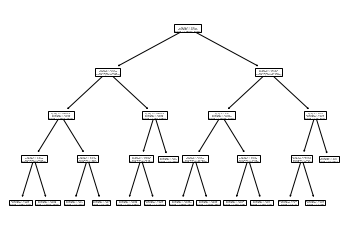

In [ ]:
tree.plot_tree(adult_tree)

In [ ]:
pred_tree = adult_tree.predict(X_test)

In [ ]:
pred_tree[0:5] , y_test[0:5]

(array(['<=50K', '<=50K', '<=50K', '>50K', '<=50K'], dtype=object),
 10840    <=50K
 10954    <=50K
 3374     <=50K
 10839     >50K
 32047    <=50K
 Name: income, dtype: object)

In [ ]:
print('DT accuracy:', metrics.accuracy_score(y_test,pred_tree))

DT accuracy: 0.8451848168407095


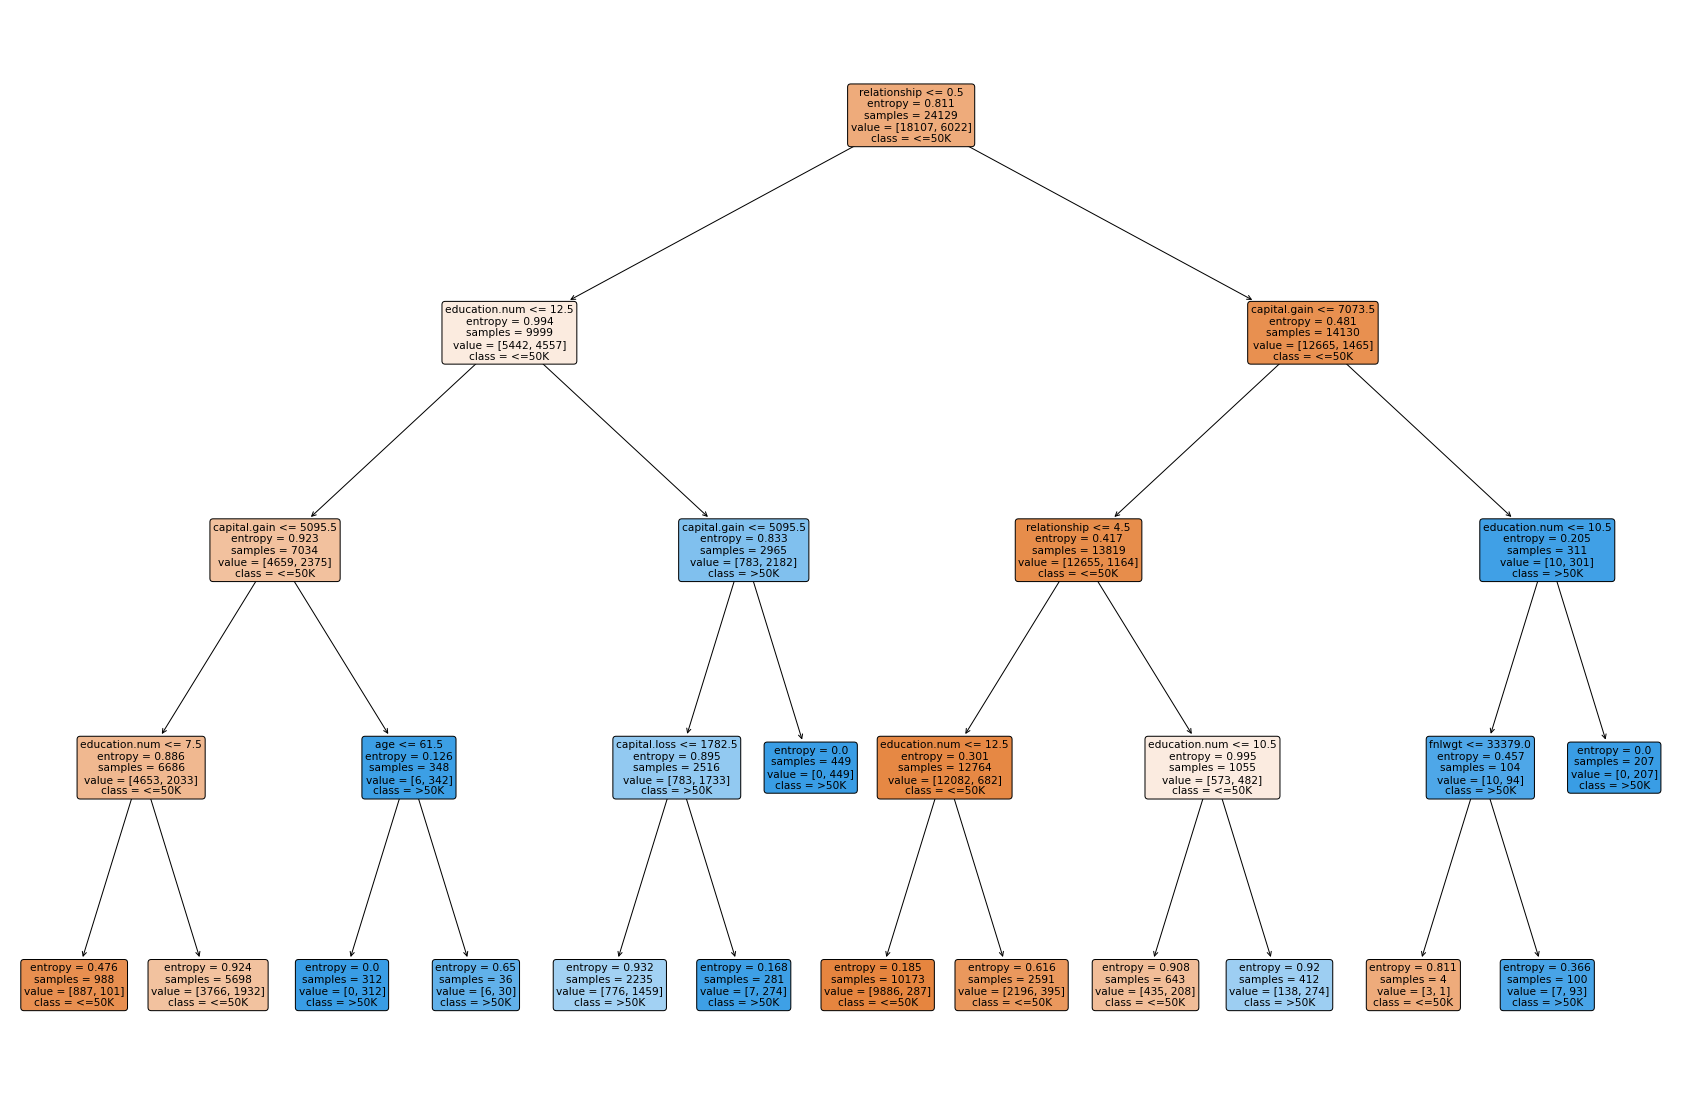

In [ ]:
plt.figure(figsize=(30,20))
features = df.columns[:-1]
dt = plot_tree(decision_tree=adult_tree,feature_names = features,
               class_names = np.unique(y_train), filled=True, rounded=True )

In [ ]:
cm = confusion_matrix(y_test,pred_tree)
cm

array([[4304,  243],
       [ 691,  795]], dtype=int64)

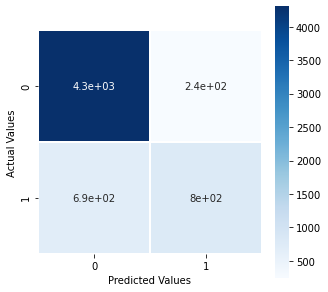

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5,annot=True,square=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()